# Predict automobile price using Machine Learning

### Objective

### Data description

### Import Library and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
cars = pd.read_csv("AutoData (1).csv")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [3]:
cars.head(2)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


#### Data Cleanning

In [4]:
print(f"Missing Values :\n{cars.isnull().sum()}")

Missing Values :
symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Understanding the data

In [5]:
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# symboling: -2 (least risky) to +3 most risky
cars['symboling'].astype('category').value_counts()
# Most cars are 0,1,2

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
# drivewheel: frontwheel, rear wheel and four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [8]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

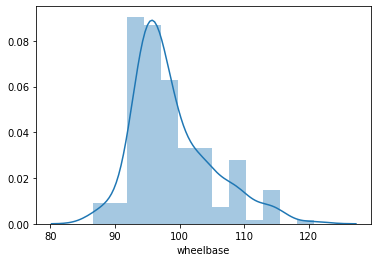

In [9]:
# wheelbase: distance between centre of front and rear wheels
sns.distplot(cars['wheelbase'])
plt.show()

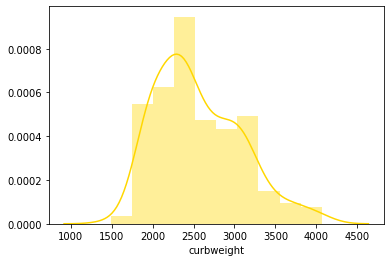

In [10]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'],color="gold")
plt.show()

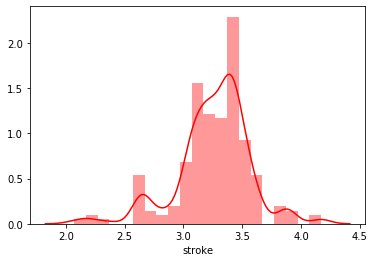

In [11]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(cars['stroke'],color="red")
plt.show()

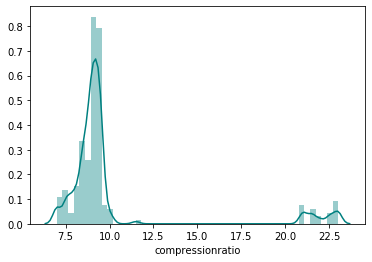

In [12]:
# compression ration: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(cars['compressionratio'],color='teal')
plt.show()

Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

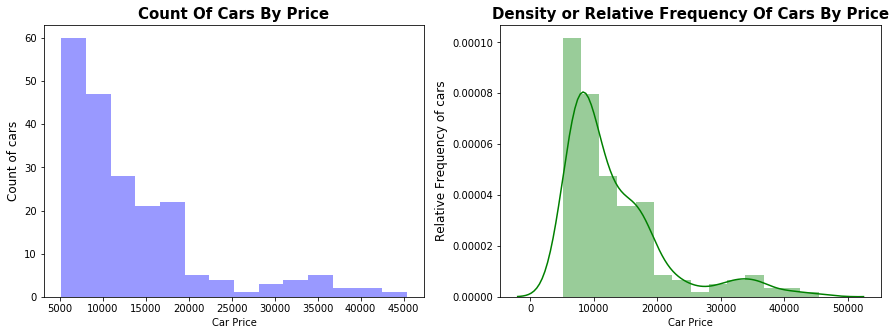

In [13]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(cars['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(cars['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")


#### To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.

In [14]:
#creating df  with numeric var's only
cars_numeric=cars.select_dtypes(include=['float64','int64'])
cars_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


dropping symboling colmn is more of categorical variable as described before

In [15]:
cars_numeric = cars_numeric.drop(['symboling'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 1440x720 with 0 Axes>

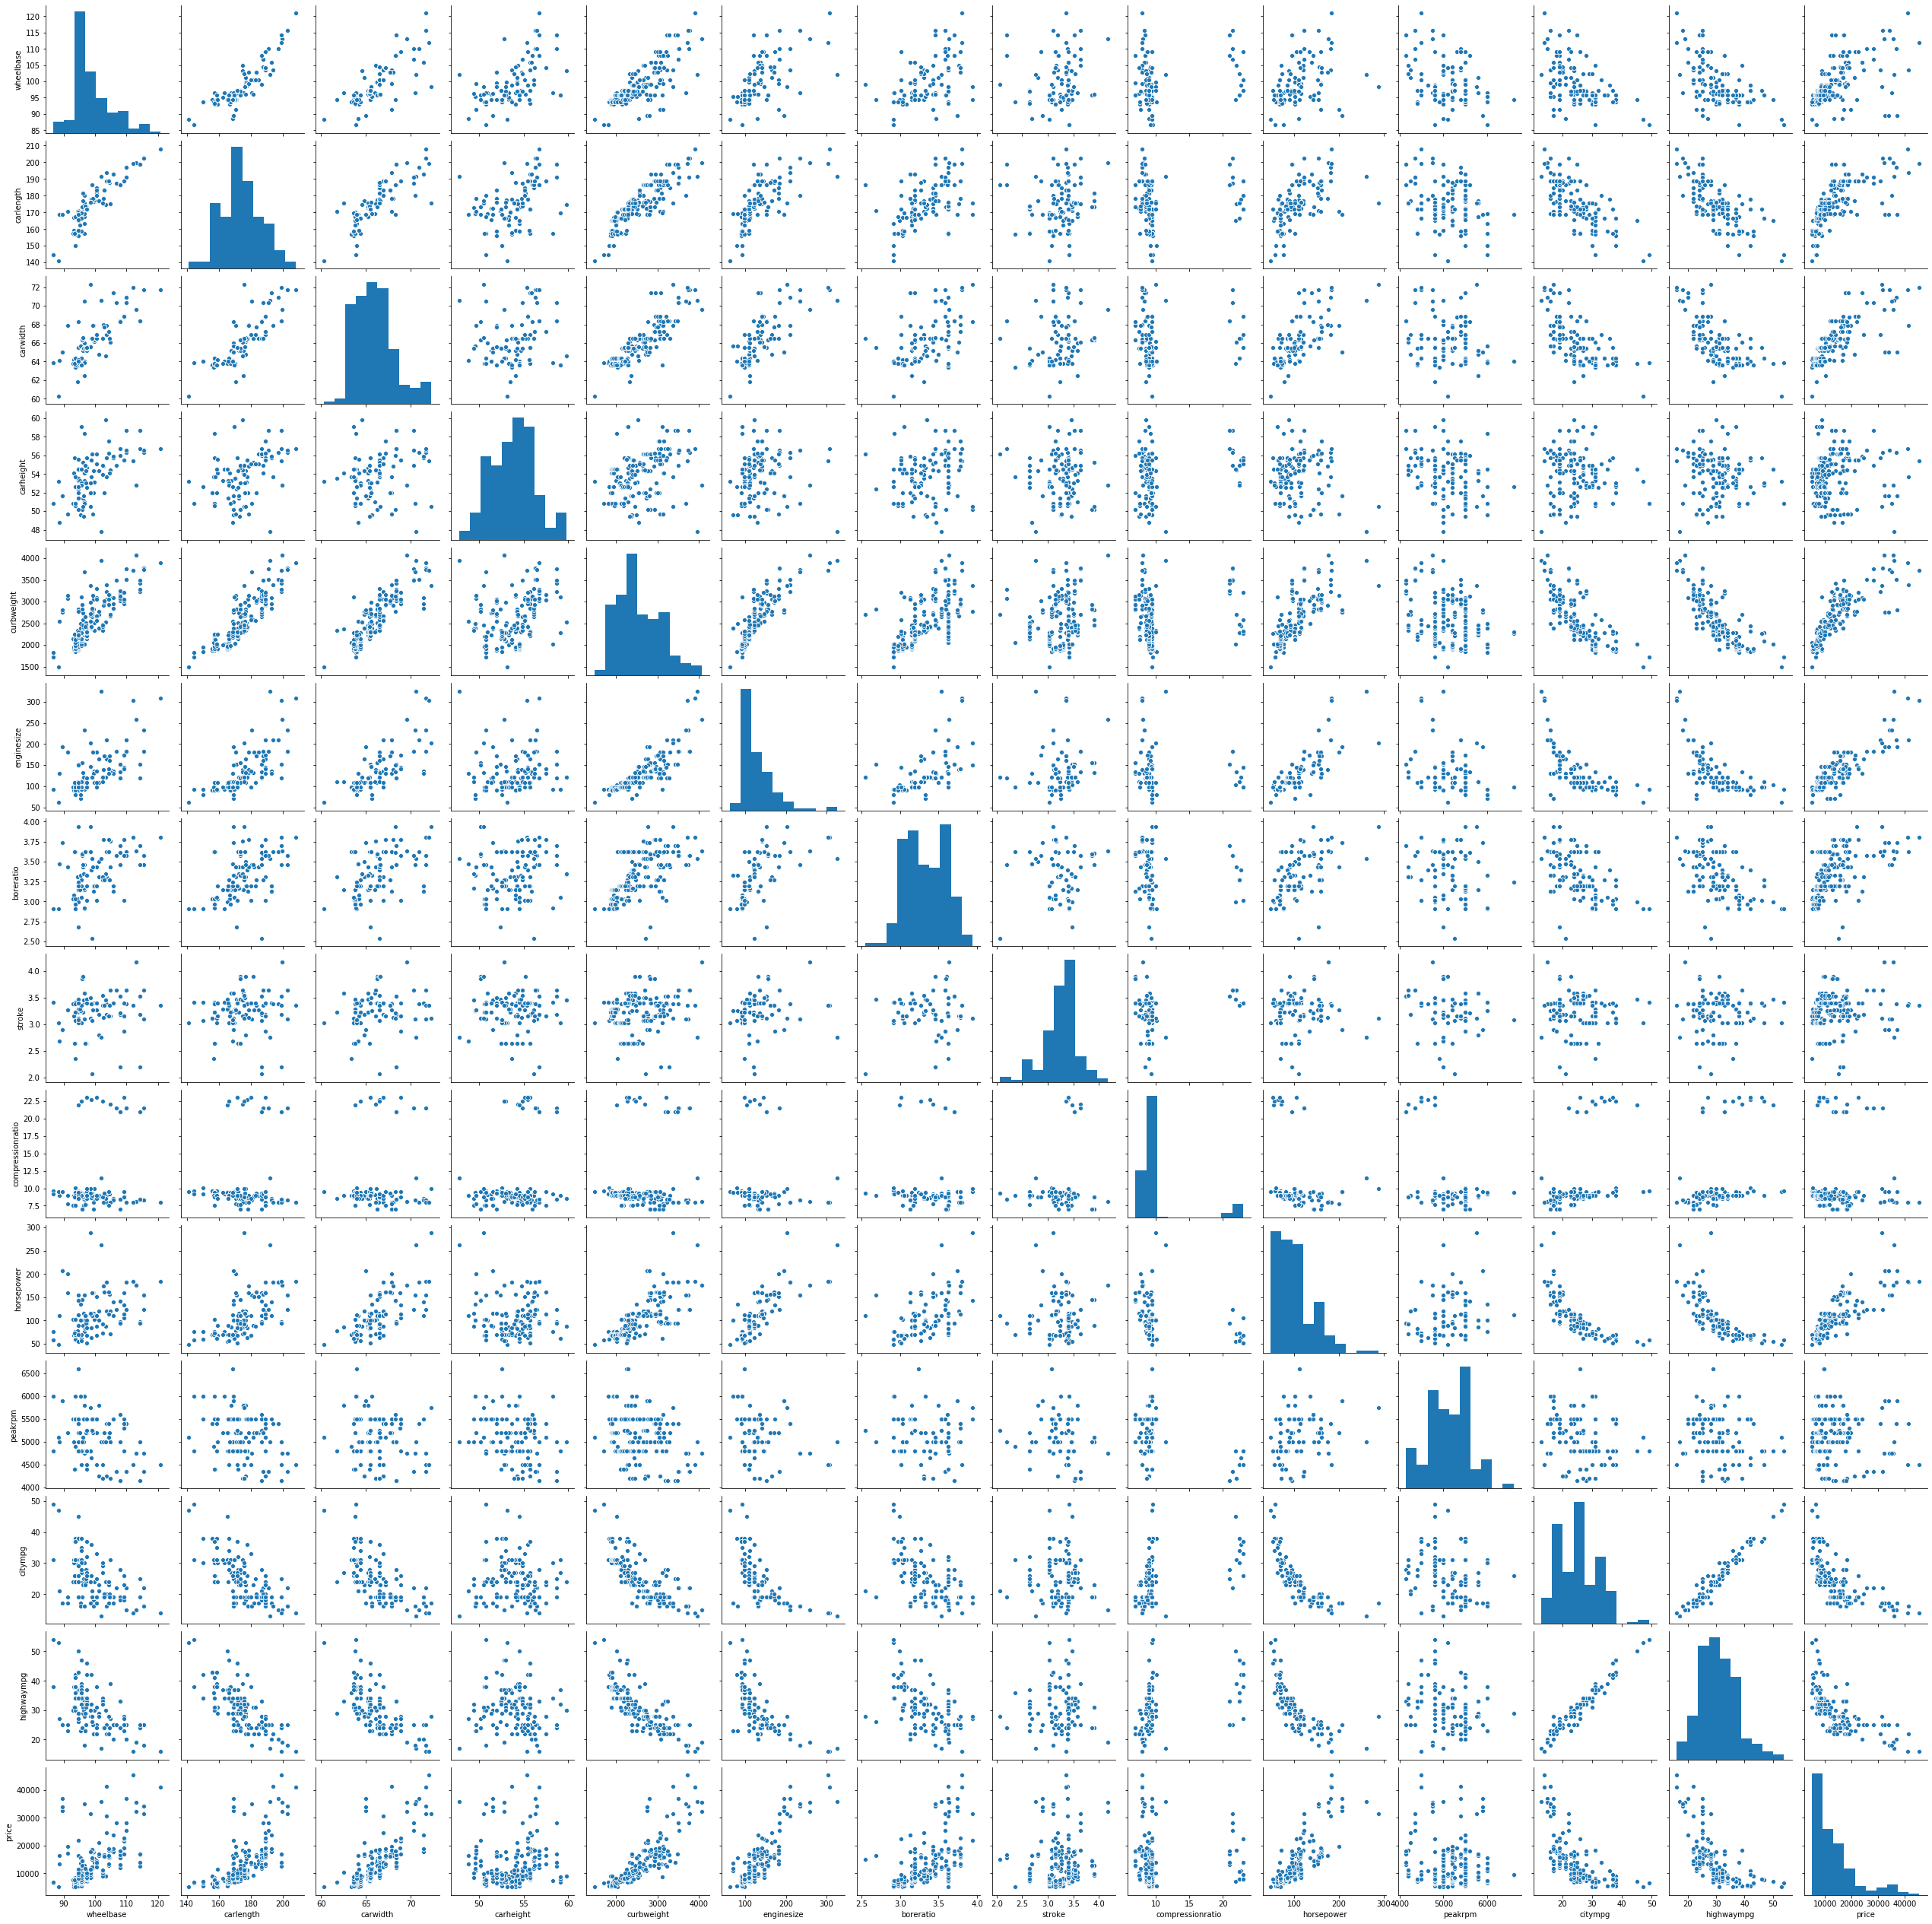

In [16]:
# pair wise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)

#as we can see its difficult to interpret these graphs due to somany of them
#a BETTER way of checking linearity is in below cell

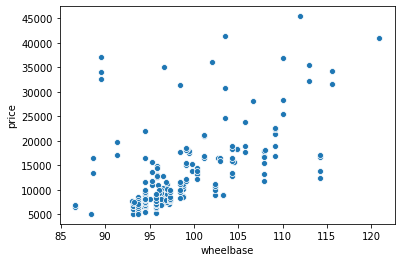

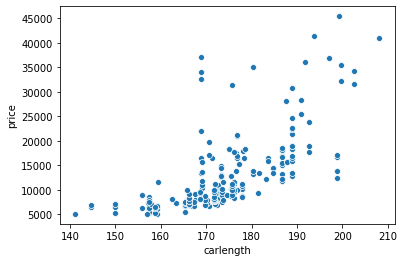

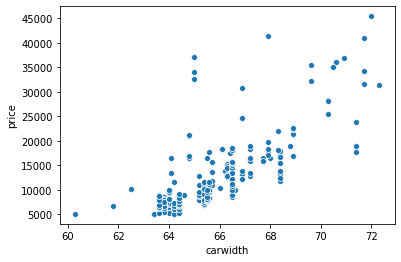

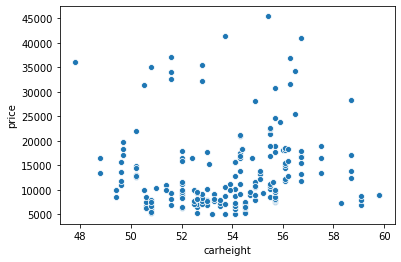

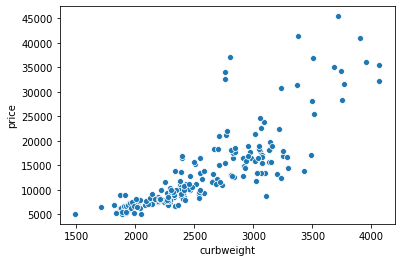

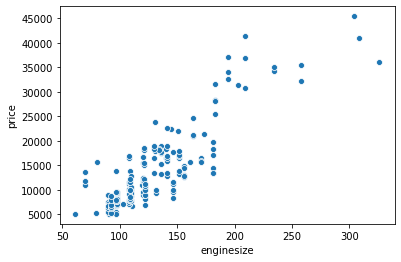

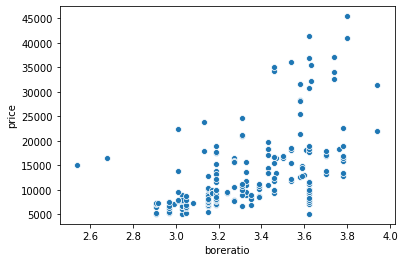

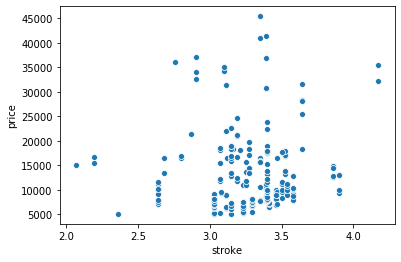

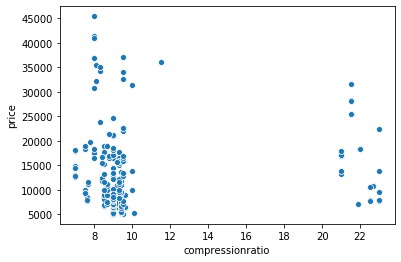

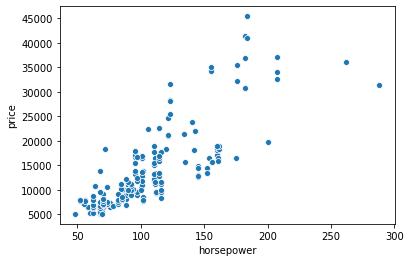

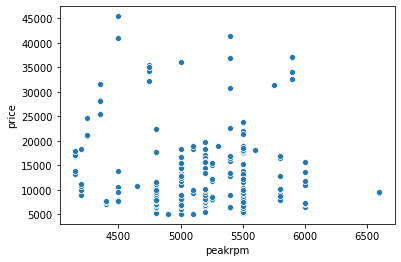

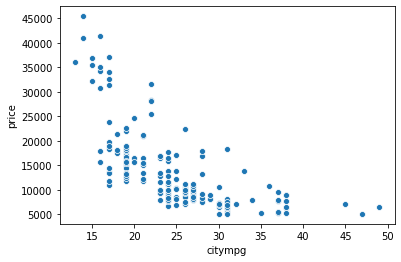

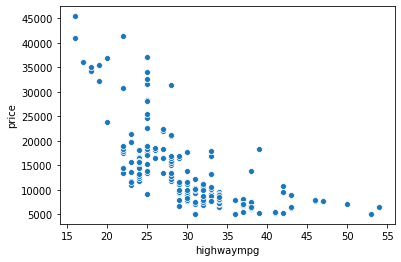

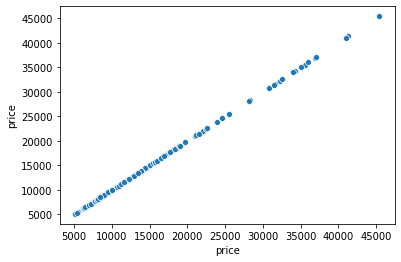

In [17]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

for i, col in enumerate (cars_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=cars_numeric[col],y=cars_numeric['price'])

- These var's appears to have a linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and {citympg,highwaympg} (-ve relation). 
    
    
- Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price.


- In linear regression assumptions validation section we will check for linearity assumption in detail 

### Correlation matrix

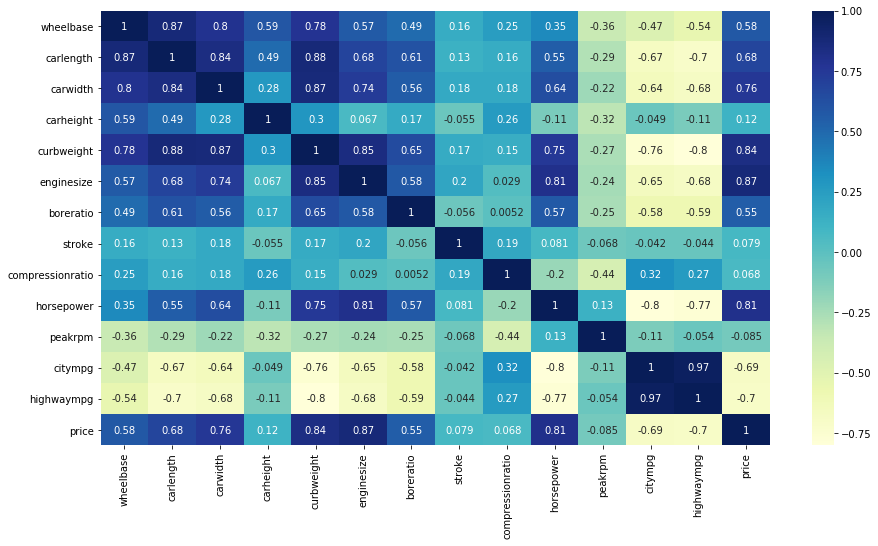

In [18]:
corr=cars_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

#### Useful insights from Corr Heatmap

 1. <b> Dependent var and indep. var's<b>

> Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables     represent the size/weight/engine power of the car)
    
> Negative corr: Price negatively corr with mpg var's citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg 

2. <b> Correlation among independent variables:<b>

> Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of         'size/weight', and are positively correlated 


Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity, which we will check in assumptions validation section using VIF score.

### Data updating

In [19]:
cars.info()

#no missing values

#all var's in correct format, however since symboling is a categorical var we need to change its type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [20]:
cars['symboling']=cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [21]:
#Extracting car names. 
#car name is the first word (before space)
carnames = cars['make'].apply(lambda x: x.split(" ")[0])
carnames[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: make, dtype: object

In [22]:
#many car names are duplicates like toyota and toyouta, porsche and porcshce etc.
# we need to fix incorrect spelling and get carnames column in order
cars['car_company']=carnames
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
maxda           2
mercury         1
porcshce        1
vokswagen       1
Nissan          1
toyouta         1
Name: car_company, dtype: int64

In [23]:
#volkswagen
cars.loc[(cars['car_company']=="vw")|(cars['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

cars.loc[(cars['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
cars.loc[(cars['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [24]:
# drop make variable, we don't need it
cars = cars.drop('make', axis=1)

In [25]:
cars.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero


### Data Preparation: feature engineering

In [26]:
X=cars.drop(columns=['price'])
y=cars['price']

In [27]:
# creating dummy variables for categorical variables
'''Dummy variables are useful because they enable us to use a single regression equation to represent 
multiple groups. 

This means that we don’t need to write out separate equation models for each subgroup. 
The dummy variables act like ‘switches’ that turn various parameters on and off in an equation.'''

cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero


In [28]:
#creating dummy variables
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X=X.drop(columns=cars_categorical)
X.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27


In [30]:
X=pd.concat([X,cars_dummies],axis=1)
X.head(6)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,0,0,0


### Scaling the features

In [31]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols=X.columns
X=pd.DataFrame(scale(X))
X.columns=cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [32]:
#all means = 0 or as good as zero and std=1
X.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,...,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-7.251652e-16,-6.452833e-16,3.552714e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
25%,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
50%,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
75%,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
max,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,...,3.223180e+00,4.199567e+00,5.318432e+00,6.324555e+00,1.007472e+01,5.759051e+00,4.010403e+00,2.325134e+00,4.010403e+00,4.199567e+00


In [33]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

### Model Building and Feature Selection using RFE

Since dependent variable price looks to be linearly related to most of the independent variables we are using Linear Regression only and not other types of regression like Polynomial, Random Forest/Boosting regression etc.

In [34]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)

In [35]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print(f"R-sqaure on train data: {r2_score(y_train, y_pred_train)}")
print(f"R-sqaure on test data: {r2_score(y_test, y_pred_test)}")

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print(f"RMSE on train data: {(((error_train**2).mean())**0.5)}")
print(f"RMSE on test data: {(((error_test**2).mean())**0.5)}")

R-sqaure on train data: 0.9756892503873289
R-sqaure on test data: 0.8382621393399066
RMSE on train data: 1213.0021196738403
RMSE on test data: 3365.465234388095


Massive overfitting: All features in model is never a good idea unless features are too less and all of them are important, so using Recursive feature elimination to reduce dimensionality

### Feature selection using RFE

Lets first decide optimal number of features rather than arbitarily specifying count of features to be used in model in the RFE function

In [36]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

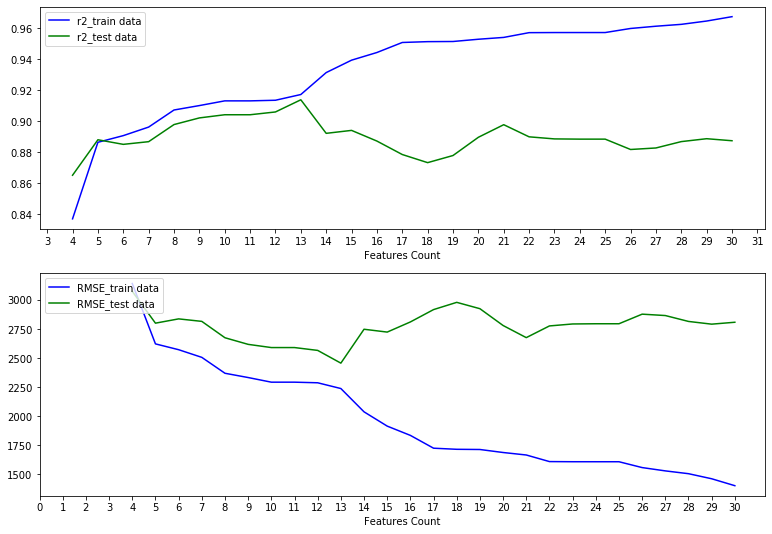

In [37]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))#method 2 of ticks

plt.show()

From the above graphs we find: 

1. R sqaure for test data peaks at 13 features and at this point model generalises well  as train R2 is v close to test. Train R2 keep on increasing beyond 13 features but R2 keeps increasing as you add more features to train data. We have select number of features where model accuracy and generalization both are at satisfactory level.

    
2. RMSE for test data is lowest at 13 features and beyond that it increases. Train RMSE at 13 also looks good, adding more features to train decreases RMSE but again there is always a trade off between removing features (aka reducing complexity) and model performance. So we will go with 13 features. 

### Modelling the Data & Evaluation + Feature selection

In [38]:
# Importing the necessary SciKit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [39]:
# Creating a function to model the data with knn and evaluate using root mean squared error
def knn_train_test(df, col, kval):
    X = df[[col]]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    for k in kval:
        knn = KNeighborsRegressor(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** (1/2)
        print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        plt.xlim([0,10])
        plt.ylim([0,10000])
        plt.xticks([1,3,5,7,9])
        plt.bar(k,rmse)
                         
    plt.show()   

In [40]:
cars.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'car_company'],
      dtype='object')

In [41]:
features = ['highwaympg', 'citympg', 'peakrpm', 'horsepower', 'enginesize', 'curbweight', 
            'carwidth', 'carlength', 'carheight', 'wheelbase','boreratio', 'stroke']

RMSE of highwaympg for k = 1 : 5343.874725473855
RMSE of highwaympg for k = 3 : 4610.320387737471
RMSE of highwaympg for k = 5 : 4370.495326403062
RMSE of highwaympg for k = 7 : 4296.303416594248
RMSE of highwaympg for k = 9 : 4627.603872989867


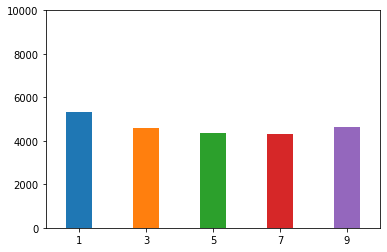

RMSE of citympg for k = 1 : 5366.430217042819
RMSE of citympg for k = 3 : 4280.167066471818
RMSE of citympg for k = 5 : 4542.531373675597
RMSE of citympg for k = 7 : 4195.788563066425
RMSE of citympg for k = 9 : 4163.769905967899


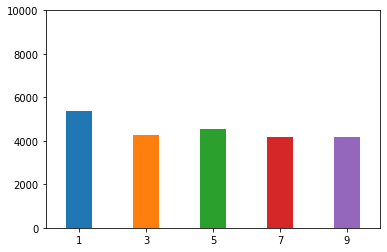

RMSE of peakrpm for k = 1 : 6577.642541859895
RMSE of peakrpm for k = 3 : 7069.112670773045
RMSE of peakrpm for k = 5 : 6788.317925942007
RMSE of peakrpm for k = 7 : 6958.881916864403
RMSE of peakrpm for k = 9 : 7191.034869672461


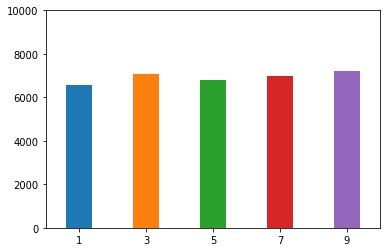

RMSE of horsepower for k = 1 : 3886.872456603437
RMSE of horsepower for k = 3 : 3916.7928491177227
RMSE of horsepower for k = 5 : 3842.955220955503
RMSE of horsepower for k = 7 : 3902.8784810202123
RMSE of horsepower for k = 9 : 3970.5852975873695


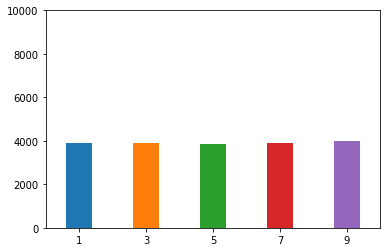

RMSE of enginesize for k = 1 : 2723.1502426238694
RMSE of enginesize for k = 3 : 2263.1011188453863
RMSE of enginesize for k = 5 : 2546.0832013772647
RMSE of enginesize for k = 7 : 3047.0866904481018
RMSE of enginesize for k = 9 : 3227.8990383362666


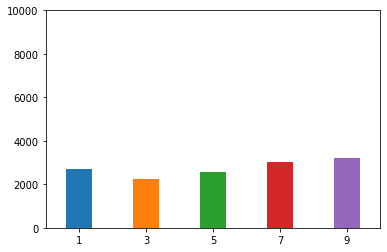

RMSE of curbweight for k = 1 : 6388.204681667459
RMSE of curbweight for k = 3 : 4789.531467471157
RMSE of curbweight for k = 5 : 4983.508150616809
RMSE of curbweight for k = 7 : 4778.191636598361
RMSE of curbweight for k = 9 : 4917.940464292205


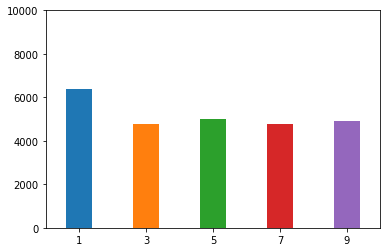

RMSE of carwidth for k = 1 : 3912.8453443784856
RMSE of carwidth for k = 3 : 3919.42149520131
RMSE of carwidth for k = 5 : 3187.806325786673
RMSE of carwidth for k = 7 : 3290.1265287743545
RMSE of carwidth for k = 9 : 3118.414984156844


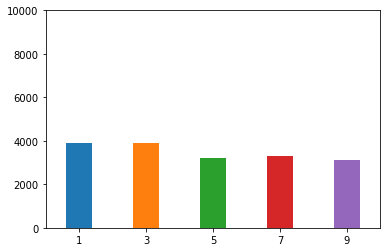

RMSE of carlength for k = 1 : 5954.473934905032
RMSE of carlength for k = 3 : 5335.065028189774
RMSE of carlength for k = 5 : 5502.21690613839
RMSE of carlength for k = 7 : 5873.343352806572
RMSE of carlength for k = 9 : 5784.047189018109


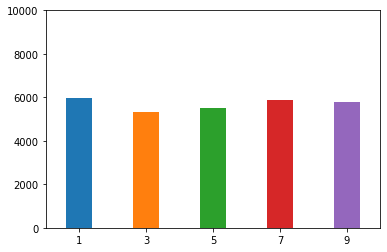

RMSE of carheight for k = 1 : 7976.256671002214
RMSE of carheight for k = 3 : 6233.844256320463
RMSE of carheight for k = 5 : 6187.169147872898
RMSE of carheight for k = 7 : 6458.949137797807
RMSE of carheight for k = 9 : 6507.629818666075


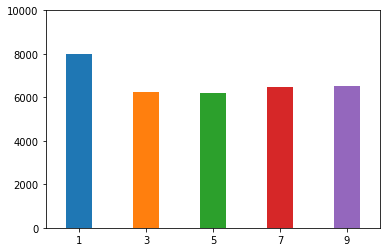

RMSE of wheelbase for k = 1 : 4697.209100363095
RMSE of wheelbase for k = 3 : 4011.0302219269533
RMSE of wheelbase for k = 5 : 5157.86429038857
RMSE of wheelbase for k = 7 : 5820.289783650277
RMSE of wheelbase for k = 9 : 6213.63484756064


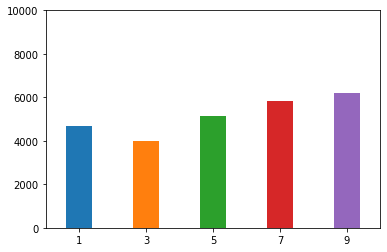

RMSE of boreratio for k = 1 : 5871.044301783924
RMSE of boreratio for k = 3 : 5613.142171693801
RMSE of boreratio for k = 5 : 6279.293666509727
RMSE of boreratio for k = 7 : 6481.185392642832
RMSE of boreratio for k = 9 : 6524.654853273701


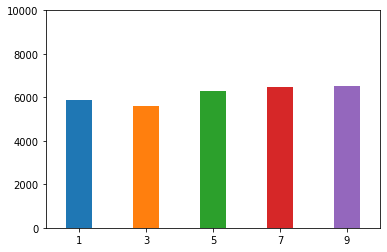

RMSE of stroke for k = 1 : 7617.043204343092
RMSE of stroke for k = 3 : 7529.039124767279
RMSE of stroke for k = 5 : 7263.018779842268
RMSE of stroke for k = 7 : 7355.455053424884
RMSE of stroke for k = 9 : 7359.437844909799


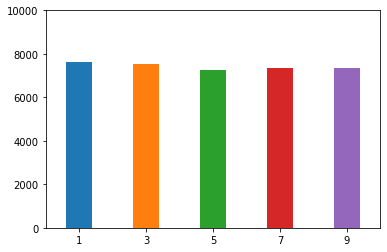

In [42]:
for i in features:
    knn_train_test(cars, i, [1, 3, 5, 7, 9])

From the graphs, we can see for engine-size ,curbweight and horsepower, the errors are lower than other variables. So I take these 3 variable to create the KNearestNeighbours model for deciding the price of the car

In [43]:
# three_var = ['enginesize', 'horsepower','curbweight']
# four_var = ['enginesize', 'horsepower','curbweight','carwidth' ] # For 4 variables
# five_var = ['enginesize', 'horsepower', 'curbweight','carwidth', 'highwaympg'] # For 5 variables
# six_var = ['enginesize', 'horsepower', 'curbweight','carwidth', 'highwaympg','citympg'] # for 6 variables

In [44]:
two_var = ['enginesize', 'horsepower']
three_var = ['enginesize', 'horsepower','carwidth' ] # For 3 variables
four_var = ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] # For 4 variables
five_var = ['enginesize', 'horsepower', 'carwidth', 'highwaympg','citympg'] # for 5 variables

In [45]:
# Creating a function to model and evaluate with a specific k value
def knn_train_test1(df, col, k):
    X = df[col]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** (1/2)
    print("RMSE of {} for k = {} : {}".format(col,k, rmse))

In [46]:
# knn_train_test1(cars, three_var, 3)
# knn_train_test1(cars, four_var, 3)
# knn_train_test1(cars, five_var, 3)
# knn_train_test1(cars, six_var, 3)

In [47]:
knn_train_test1(cars,two_var, 3)
knn_train_test1(cars, three_var, 3)
knn_train_test1(cars, four_var, 3)
knn_train_test1(cars, five_var, 3)

RMSE of ['enginesize', 'horsepower'] for k = 3 : 3053.305116055124
RMSE of ['enginesize', 'horsepower', 'carwidth'] for k = 3 : 3450.776443109504
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 3 : 4800.946255317159
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg', 'citympg'] for k = 3 : 3190.484186585313


In [48]:
kval = np.arange(1,26,1) # Listing K-values for hyperparameter optimization

In [49]:
def knn_train_test2(df, col, kval):
    X = df[col]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    for k in kval:
        knn = KNeighborsRegressor(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** (1/2)
        print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        plt.xlim([0,25])
        plt.ylim([0,7000])
        plt.xticks(kval)
        plt.xlabel("K value")
        plt.ylabel("RMSE")
        plt.title("Error graph for each K value")
        plt.bar(k,rmse)
    plt.show()

RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 1 : 2505.489460637012
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 2 : 2537.8651347669334
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 3 : 2397.4107206116196
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 4 : 2373.79189815649
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 5 : 2422.640905924918
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 6 : 2409.4934193259523
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 7 : 2494.5787933249976
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 8 : 2521.7333492096955
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 9 : 2566.487638177065
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] for k = 10 : 2624.8107851716454
RMSE of ['enginesize', 'horsepower', 'carwidth', 'highwaympg'] f

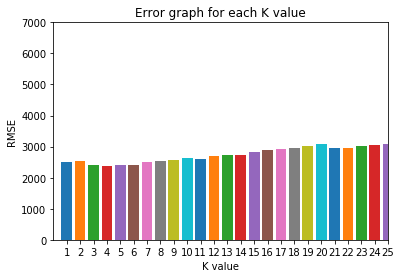

In [50]:
knn_train_test2(cars, four_var, kval)

From the graph, we see that the error is higher when k value goes beyind 4. RMSE is in the lower range when k < 4. 
Based on this observation, I choose k=3 and these four variables (enginesize, horsepower, carwidth) for an 
optimal model for deciding the price of the cars.

### Now predict price with data which is not available in dataset

In [51]:
reg1 =linear_model.LinearRegression()
reg1.fit(cars[['enginesize','horsepower','carwidth']],cars.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
reg1.predict([[140,122,64.1]])

array([13929.73843493])